# ML project 1: multiple regression & regularization

## import data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
import sklearn.metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

%matplotlib inline

import pandas as pd
!pip install pyreadstat

In [11]:
#df = pd.read_spss("./data/NYCHVS17T_occupied.sav")

In [12]:
#df

,seqno,person,boro,sba,units,stories,elevator,yearbuilt,acc_street,acc_elevator,...,sex_d,singleperson_d,Dummy1,Dummy2,Dummy3,Dummy4,Dummy5,hhinc_clean,rent_clean,hhinc_1k
0,38406.0,1.0,1.0,101.0,11.0,2.0,2.0,2.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,95000.0,NaN,95.000
1,836735.0,1.0,1.0,101.0,3.0,1.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,21372.0,1075.0,21.372
2,438776.0,8.0,1.0,101.0,4.0,1.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33000.0,1275.0,33.000
3,778427.0,1.0,1.0,101.0,10.0,4.0,2.0,8.0,2.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,39655.0,944.0,39.655
4,721432.0,1.0,1.0,101.0,10.0,4.0,2.0,8.0,2.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,45952.0,NaN,45.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,941210.0,1.0,5.0,502.0,1.0,1.0,2.0,7.0,2.0,4.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24636.0,100.0,24.636
13262,354490.0,1.0,5.0,503.0,1.0,1.0,2.0,7.0,2.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,17800.0,NaN,17.800
13263,707788.0,1.0,5.0,503.0,1.0,1.0,2.0,9.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,42000.0,NaN,42.000
13264,810900.0,1.0,5.0,503.0,1.0,1.0,2.0,10.0,2.0,4.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,34400.0,650.0,34.400


In [608]:
#df.to_csv("./data/NYCHVS17T_occupied.csv", index=False)

In [609]:
df = pd.read_csv("./data/NYCHVS17T_occupied.csv")

In [610]:
df.head()

,seqno,person,boro,sba,units,stories,elevator,yearbuilt,acc_street,acc_elevator,...,sex_d,singleperson_d,Dummy1,Dummy2,Dummy3,Dummy4,Dummy5,hhinc_clean,rent_clean,hhinc_1k
0,38406.0,1.0,1.0,101.0,11.0,2.0,2.0,2.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,95000.0,NaN,95.000
1,836735.0,1.0,1.0,101.0,3.0,1.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,21372.0,1075.0,21.372
2,438776.0,8.0,1.0,101.0,4.0,1.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33000.0,1275.0,33.000
3,778427.0,1.0,1.0,101.0,10.0,4.0,2.0,8.0,2.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,39655.0,944.0,39.655
4,721432.0,1.0,1.0,101.0,10.0,4.0,2.0,8.0,2.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,45952.0,NaN,45.952


In [611]:
df.shape

(13266, 158)

In [612]:
attribute_list = df.columns.values.tolist()
attribute_list

['seqno',
 'person',
 'boro',
 'sba',
 'units',
 'stories',
 'elevator',
 'yearbuilt',
 'acc_street',
 'acc_elevator',
 'acc_res',
 'nostairs_elevator',
 'nostairs_unit',
 'housingtype',
 'tenure',
 'rooms',
 'beds',
 'aircond',
 'hhsize',
 'hhincome',
 'memberunder6',
 'memberunder18',
 'mdef_noheat',
 'mdef_rodents',
 'mdef_walls',
 'mdef_floors',
 'mdef_peelingpaint',
 'mdef_toilet',
 'mdef_leaks',
 'addheat',
 'num_noheat',
 'anypeelingpaint',
 'roaches',
 'crent',
 'grent',
 'ownercost',
 'ra_s8',
 'ra_other',
 'pa_any',
 'delay_dental',
 'delay_preventive',
 'delay_mentalhealth',
 'delay_diagnosis',
 'delay_script',
 'delay_utility',
 'delay_landline',
 'delay_cell',
 'delay_internet',
 'delay_other',
 'aff_me',
 'aff_condition',
 'aff_location',
 'ratenabe',
 'r_raceeth',
 'r_hisp',
 'r_sex',
 'r_age',
 'foreignborn',
 'placeborn',
 'mom_placeborn',
 'dad_placeborn',
 'yearmovedus',
 'yearmovednyc',
 'yearmovedunit',
 'srhealth',
 'meddevice',
 'landline',
 'cellphones',
 'fw1',

In [613]:
attribute_list.index('grent')

34

In [614]:
attribute_list.index('ownercost')

35

In [615]:
#pick the variables needed
df = df.iloc[:, np.r_[0:34,36:67]]
print(df.columns)
print(df.shape)

Index(['seqno', 'person', 'boro', 'sba', 'units', 'stories', 'elevator',
       'yearbuilt', 'acc_street', 'acc_elevator', 'acc_res',
       'nostairs_elevator', 'nostairs_unit', 'housingtype', 'tenure', 'rooms',
       'beds', 'aircond', 'hhsize', 'hhincome', 'memberunder6',
       'memberunder18', 'mdef_noheat', 'mdef_rodents', 'mdef_walls',
       'mdef_floors', 'mdef_peelingpaint', 'mdef_toilet', 'mdef_leaks',
       'addheat', 'num_noheat', 'anypeelingpaint', 'roaches', 'crent', 'ra_s8',
       'ra_other', 'pa_any', 'delay_dental', 'delay_preventive',
       'delay_mentalhealth', 'delay_diagnosis', 'delay_script',
       'delay_utility', 'delay_landline', 'delay_cell', 'delay_internet',
       'delay_other', 'aff_me', 'aff_condition', 'aff_location', 'ratenabe',
       'r_raceeth', 'r_hisp', 'r_sex', 'r_age', 'foreignborn', 'placeborn',
       'mom_placeborn', 'dad_placeborn', 'yearmovedus', 'yearmovednyc',
       'yearmovedunit', 'srhealth', 'meddevice', 'landline'],
      dtype=

In [616]:
#no missing values
df.isna().sum().sum()

0

In [617]:
df.median().head()

/var/folders/yt/mrl3b5bd76lc2wz42ldb8zvw0000gn/T/ipykernel_81692/418472246.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median().head()


seqno     500472.5
person         1.0
boro           3.0
sba          302.0
units         11.0
dtype: float64

In [618]:
#we are picking crent(contract rent) as our outcome variable
df['crent'].describe()

count    13266.000000
mean     33933.897030
std      46266.817807
min         16.000000
25%       1107.250000
50%       1800.000000
75%      99999.000000
max      99999.000000
Name: crent, dtype: float64

In [619]:
df['crent'].value_counts().sort_index()

16.0          1
50.0          1
93.0          1
100.0         6
101.0         1
           ... 
5895.0        1
5900.0        3
5995.0        2
7688.0       85
99999.0    4364
Name: crent, Length: 1428, dtype: int64

In [620]:
#99999 represents missing value, replace it with the median
df.loc[df['crent'] == 99999, 'crent'] = 0

In [621]:
df['crent'].value_counts().sort_index()

0.0       4364
16.0         1
50.0         1
93.0         1
100.0        6
          ... 
5850.0       3
5895.0       1
5900.0       3
5995.0       2
7688.0      85
Name: crent, Length: 1428, dtype: int64

In [622]:
df.loc[df['crent'] == 0, 'crent'] = df['crent'].median()

In [623]:
df['crent'].value_counts().sort_index()

16.0       1
50.0       1
93.0       1
100.0      6
101.0      1
          ..
5850.0     3
5895.0     1
5900.0     3
5995.0     2
7688.0    85
Name: crent, Length: 1427, dtype: int64

<AxesSubplot:xlabel='seqno', ylabel='crent'>

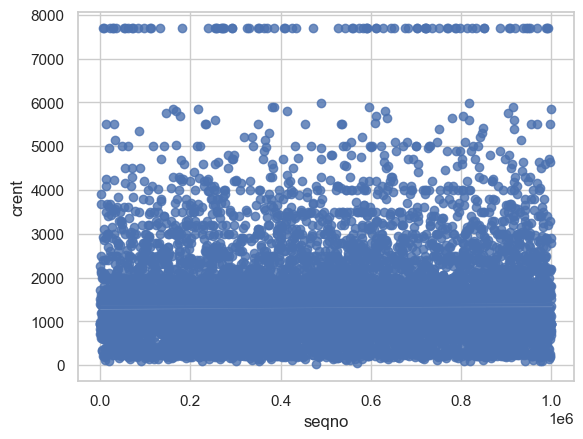

In [624]:
sns.regplot(x=df["seqno"], y=df["crent"])

In [625]:
#m = df.select_dtypes(np.number)
#df[m.columns]= m.round().astype('Int64')

In [626]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13266 entries, 0 to 13265
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqno               13266 non-null  float64
 1   person              13266 non-null  float64
 2   boro                13266 non-null  float64
 3   sba                 13266 non-null  float64
 4   units               13266 non-null  float64
 5   stories             13266 non-null  float64
 6   elevator            13266 non-null  float64
 7   yearbuilt           13266 non-null  float64
 8   acc_street          13266 non-null  float64
 9   acc_elevator        13266 non-null  float64
 10  acc_res             13266 non-null  float64
 11  nostairs_elevator   13266 non-null  float64
 12  nostairs_unit       13266 non-null  float64
 13  housingtype         13266 non-null  float64
 14  tenure              13266 non-null  float64
 15  rooms               13266 non-null  float64
 16  beds

In [627]:
df['r_raceeth'].value_counts()

White, non-Hispanic    5433
Hispanic               3230
Black, non-Hispanic    2830
Asian, non-Hispanic    1652
Other, non-Hispanic     121
Name: r_raceeth, dtype: int64

In [628]:
#dummy code race variable
df['race_d'] = df['r_raceeth'].replace(['White, non-Hispanic','Hispanic', 'Black, non-Hispanic', 'Asian, non-Hispanic', 'Other, non-Hispanic'], [1,2,3,4,5])

In [629]:
df['race_d']

0        2
1        2
2        2
3        2
4        2
        ..
13261    1
13262    1
13263    1
13264    1
13265    1
Name: race_d, Length: 13266, dtype: int64

In [630]:
#now check dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13266 entries, 0 to 13265
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqno               13266 non-null  float64
 1   person              13266 non-null  float64
 2   boro                13266 non-null  float64
 3   sba                 13266 non-null  float64
 4   units               13266 non-null  float64
 5   stories             13266 non-null  float64
 6   elevator            13266 non-null  float64
 7   yearbuilt           13266 non-null  float64
 8   acc_street          13266 non-null  float64
 9   acc_elevator        13266 non-null  float64
 10  acc_res             13266 non-null  float64
 11  nostairs_elevator   13266 non-null  float64
 12  nostairs_unit       13266 non-null  float64
 13  housingtype         13266 non-null  float64
 14  tenure              13266 non-null  float64
 15  rooms               13266 non-null  float64
 16  beds

In [631]:
#m = df.select_dtypes(np.number)
#df[m.columns]= m.round().astype('Int64')

In [632]:
#now the dummy race variable is the same numpy integer as the rest
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13266 entries, 0 to 13265
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   seqno               13266 non-null  float64
 1   person              13266 non-null  float64
 2   boro                13266 non-null  float64
 3   sba                 13266 non-null  float64
 4   units               13266 non-null  float64
 5   stories             13266 non-null  float64
 6   elevator            13266 non-null  float64
 7   yearbuilt           13266 non-null  float64
 8   acc_street          13266 non-null  float64
 9   acc_elevator        13266 non-null  float64
 10  acc_res             13266 non-null  float64
 11  nostairs_elevator   13266 non-null  float64
 12  nostairs_unit       13266 non-null  float64
 13  housingtype         13266 non-null  float64
 14  tenure              13266 non-null  float64
 15  rooms               13266 non-null  float64
 16  beds

In [633]:
#drop original race variable
df.drop('r_raceeth', axis=1, inplace=True)

In [634]:
df.shape

(13266, 65)

## Least Squares Multiple Regression

In [635]:
#take crent out of X since it's the outcome variable
X = df.iloc[:, np.r_[1:33, 34:65]] 
y = df["crent"]

In [636]:
print(X.shape)
print(y)

(13266, 63)
0         950.0
1        1075.0
2        1275.0
3         944.0
4         950.0
          ...  
13261     100.0
13262     950.0
13263     950.0
13264     650.0
13265     250.0
Name: crent, Length: 13266, dtype: float64


### Standard multiple regression

In [637]:
model = LinearRegression()

In [638]:
model.fit(X,y)

LinearRegression()

In [639]:
predictions = model.predict(X)

In [640]:
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  563601.905107093
mean_absolute_error :  490.06521802958775


In [641]:
SS_Residual = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.36845313882263775


### prediction vs. actual

In [642]:
scatdf = pd.DataFrame(predictions)
scatdf = scatdf.rename({0:'Pred'}, axis=1)

<AxesSubplot:xlabel='crent', ylabel='Pred'>

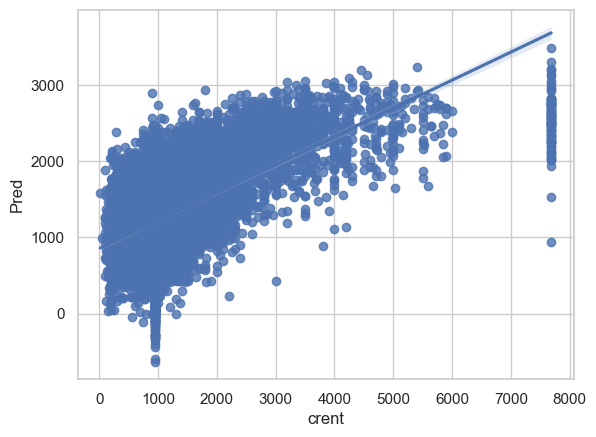

In [643]:
sns.set(style='whitegrid')

sns.regplot(x=y,
            y= scatdf['Pred'])

### Print all the regression coefficients with features

In [644]:
coef_dict_linear = {}
for coef, feature in zip(model.coef_, X.columns): 
    coef_dict_linear[feature] = coef
coef_dict_linear

{'person': -5.90021898753062,
 'boro': 1753.5225309540065,
 'sba': -17.322305686525787,
 'units': -30.377278461968398,
 'stories': 114.56941348989054,
 'elevator': -65.88508814841832,
 'yearbuilt': -16.65553316987739,
 'acc_street': -5.156562764266264,
 'acc_elevator': -10.083027923407126,
 'acc_res': 10.885231921837763,
 'nostairs_elevator': -0.3215207977621226,
 'nostairs_unit': -15.59962722705153,
 'housingtype': 5.881022219585172,
 'tenure': 4.824976271553531,
 'rooms': 24.503205226169804,
 'beds': 102.24054593804385,
 'aircond': -41.52100321522792,
 'hhsize': 51.18835545352992,
 'hhincome': 1.725028118926275e-05,
 'memberunder6': 61.605518292536914,
 'memberunder18': -110.17983031677723,
 'mdef_noheat': -9.992442285998171,
 'mdef_rodents': 42.9423492381633,
 'mdef_walls': 44.96652968133393,
 'mdef_floors': 4.434084388697791,
 'mdef_peelingpaint': 10.82451504332886,
 'mdef_toilet': -106.78689633710766,
 'mdef_leaks': 26.423482796234094,
 'addheat': 21.491193184048733,
 'num_noheat'

In [645]:
np.sum(abs(model.coef_))

4077.925242862369

### cross validation for multiple regression

In [646]:
#split the dataset into training and test sample

from sklearn.model_selection import train_test_split

In [647]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [648]:
model = LinearRegression()

In [649]:
model.fit(X_train,y_train)

LinearRegression()

In [650]:
predictions = model.predict(X_test)

In [651]:
#MSE
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  599465.9356763853
mean_absolute_error :  496.9462987698565


In [652]:
#print all feature coefficients
coef_dict_linear = {}
for coef, feature in zip(model.coef_, X.columns): 
    coef_dict_linear[feature] = coef
coef_dict_linear

{'person': -0.9128533928313638,
 'boro': 1736.353764745146,
 'sba': -17.14097798000934,
 'units': -29.268274557451303,
 'stories': 113.16664583362187,
 'elevator': 64.80039860478323,
 'yearbuilt': -14.994614750686729,
 'acc_street': -8.933835237731099,
 'acc_elevator': -18.529843296929393,
 'acc_res': 19.046120821242294,
 'nostairs_elevator': -14.8670709157779,
 'nostairs_unit': -6.8889136998298115,
 'housingtype': 5.834858849250209,
 'tenure': 2.7050451679456025,
 'rooms': 11.437506445575988,
 'beds': 112.14304734950483,
 'aircond': -42.75829486268103,
 'hhsize': 49.51708962690432,
 'hhincome': 1.5359782310042647e-05,
 'memberunder6': 72.07714147110052,
 'memberunder18': -106.70275589409289,
 'mdef_noheat': -12.858667598969255,
 'mdef_rodents': 30.599934823593802,
 'mdef_walls': 62.966840667713974,
 'mdef_floors': 6.0666062356584165,
 'mdef_peelingpaint': 9.051034347828198,
 'mdef_toilet': -142.53811271225743,
 'mdef_leaks': 19.12551198046925,
 'addheat': 24.987173347686817,
 'num_noh

In [653]:
#R squared

SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.36045225037898254


In [654]:
np.sum(abs(model.coef_))

4161.525645695141

## Ridge regression

In [655]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

In [656]:
r_reg = Ridge(alpha=10, tol = .001, normalize=True)

In [657]:
r_reg.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=10, normalize=True)

In [658]:
predictions = r_reg.predict(X)

In [659]:
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  798668.5604788098
mean_absolute_error :  545.5717311058071


In [660]:
#much smaller R squared after regularization

SS_Residual = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.10504805267543149


In [661]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

<AxesSubplot:xlabel='crent', ylabel='Pred'>

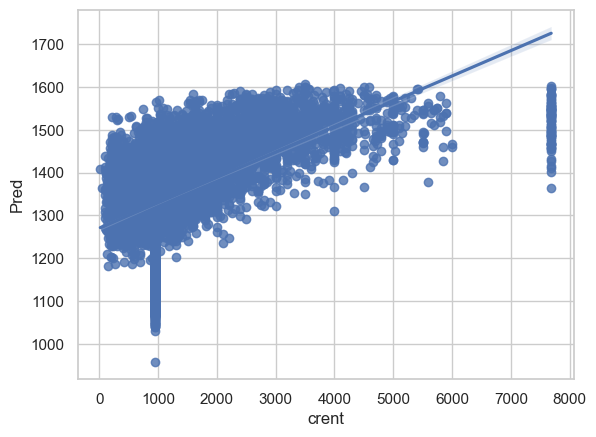

In [662]:
sns.set(style='whitegrid')

sns.regplot(x = y,  
            y = scatdf['Pred'])

In [663]:
coef_dict_ridge = {}
for coef, feature in zip(r_reg.coef_, X.columns): 
    coef_dict_ridge[feature] = coef
coef_dict_ridge

{'person': 0.0623663788702691,
 'boro': 3.5196940744419214,
 'sba': 0.030728598556150004,
 'units': 1.7487046664525066,
 'stories': 5.853121076832064,
 'elevator': -13.108175749395409,
 'yearbuilt': -2.8148145452445985,
 'acc_street': -2.66140864160451,
 'acc_elevator': -3.453242648028606,
 'acc_res': -0.36002306484948005,
 'nostairs_elevator': -1.7253503356372053,
 'nostairs_unit': -4.921923111062135,
 'housingtype': 0.8126332788746298,
 'tenure': 3.2177543861715003,
 'rooms': -1.231841426791097,
 'beds': 1.1181277107278036,
 'aircond': -2.737267007049694,
 'hhsize': 1.733462817331671,
 'hhincome': 1.8101686596550919e-06,
 'memberunder6': 6.594299519909961,
 'memberunder18': -0.5698214932437594,
 'mdef_noheat': -0.2624536979438093,
 'mdef_rodents': 0.593826435593754,
 'mdef_walls': 0.40261100898427465,
 'mdef_floors': 0.3491406792236106,
 'mdef_peelingpaint': 2.6257203620769047,
 'mdef_toilet': -14.189857562980334,
 'mdef_leaks': -0.029850313105769657,
 'addheat': 0.19075689144935015,

In [664]:
np.sum(abs(r_reg.coef_))

201.57979041630185

### working out the optimal alpha

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [666]:
r_reg = Ridge(normalize=True)

In [667]:
search = GridSearchCV(estimator = r_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [668]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END alpha=1e-06; neg_mean_squared_error: (test=-576226.348) r2: (test=0.349) total time=   0.0s
[CV 2/5] END alpha=1e-06; neg_mean_squared_error: (test=-525066.907) r2: (test=0.347) total time=   0.0s
[CV 3/5] END alpha=1e-06; neg_mean_squared_error: (test=-559233.022) r2: (test=0.363) total time=   0.0s
[CV 4/5] END alpha=1e-06; neg_mean_squared_error: (test=-570408.592) r2: (test=0.383) total time=   0.0s
[CV 5/5] END alpha=1e-06; neg_mean_squared_error: (test=-564519.675) r2: (test=0.360) total time=   0.0s
[CV 1/5] END alpha=1e-05; neg_mean_squared_error: (test=-576215.769) r2: (test=0.349) total time=   0.0s
[CV 2/5] END alpha=1e-05; neg_mean_squared_error: (test=-525025.646) r2: (test=0.347) total time=   0.0s
[CV 3/5] END alpha=1e-05; neg_mean_squared_error: (test=-559231.091) r2: (test=0.363) total time=   0.0s
[CV 4/5] END alpha=1e-05; neg_mean_squared_error: (test=-570467.749) r2: (test=0.383) total time=  

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

[CV 2/5] END alpha=0.0001; neg_mean_squared_error: (test=-524747.018) r2: (test=0.348) total time=   0.0s
[CV 3/5] END alpha=0.0001; neg_mean_squared_error: (test=-559285.630) r2: (test=0.363) total time=   0.0s
[CV 4/5] END alpha=0.0001; neg_mean_squared_error: (test=-571048.167) r2: (test=0.382) total time=   0.0s
[CV 5/5] END alpha=0.0001; neg_mean_squared_error: (test=-564389.932) r2: (test=0.361) total time=   0.0s
[CV 1/5] END alpha=0.001; neg_mean_squared_error: (test=-577536.548) r2: (test=0.348) total time=   0.0s
[CV 2/5] END alpha=0.001; neg_mean_squared_error: (test=-525066.867) r2: (test=0.347) total time=   0.0s
[CV 3/5] END alpha=0.001; neg_mean_squared_error: (test=-560857.376) r2: (test=0.362) total time=   0.0s
[CV 4/5] END alpha=0.001; neg_mean_squared_error: (test=-574700.628) r2: (test=0.378) total time=   0.0s
[CV 5/5] END alpha=0.001; neg_mean_squared_error: (test=-565260.027) r2: (test=0.360) total time=   0.0s
[CV 1/5] END alpha=0.01; neg_mean_squared_error: (t

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

[CV 2/5] END alpha=0.1; neg_mean_squared_error: (test=-526784.803) r2: (test=0.345) total time=   0.0s
[CV 3/5] END alpha=0.1; neg_mean_squared_error: (test=-569014.744) r2: (test=0.352) total time=   0.0s
[CV 4/5] END alpha=0.1; neg_mean_squared_error: (test=-587317.474) r2: (test=0.365) total time=   0.0s
[CV 5/5] END alpha=0.1; neg_mean_squared_error: (test=-568698.614) r2: (test=0.356) total time=   0.0s
[CV 1/5] END alpha=1.0; neg_mean_squared_error: (test=-633945.227) r2: (test=0.284) total time=   0.0s
[CV 2/5] END alpha=1.0; neg_mean_squared_error: (test=-568034.302) r2: (test=0.294) total time=   0.0s
[CV 3/5] END alpha=1.0; neg_mean_squared_error: (test=-624405.297) r2: (test=0.289) total time=   0.0s
[CV 4/5] END alpha=1.0; neg_mean_squared_error: (test=-654230.165) r2: (test=0.292) total time=   0.0s
[CV 5/5] END alpha=1.0; neg_mean_squared_error: (test=-621078.467) r2: (test=0.296) total time=   0.0s
[CV 1/5] END alpha=10.0; neg_mean_squared_error: (test=-796437.974) r2: (

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

[CV 2/5] END alpha=100.0; neg_mean_squared_error: (test=-791706.743) r2: (test=0.016) total time=   0.0s
[CV 3/5] END alpha=100.0; neg_mean_squared_error: (test=-865662.259) r2: (test=0.015) total time=   0.0s
[CV 4/5] END alpha=100.0; neg_mean_squared_error: (test=-911323.777) r2: (test=0.014) total time=   0.0s
[CV 5/5] END alpha=100.0; neg_mean_squared_error: (test=-869802.087) r2: (test=0.015) total time=   0.0s
[CV 1/5] END alpha=1000.0; neg_mean_squared_error: (test=-884932.477) r2: (test=0.001) total time=   0.0s
[CV 2/5] END alpha=1000.0; neg_mean_squared_error: (test=-802961.562) r2: (test=0.002) total time=   0.0s
[CV 3/5] END alpha=1000.0; neg_mean_squared_error: (test=-877148.549) r2: (test=0.001) total time=   0.0s
[CV 4/5] END alpha=1000.0; neg_mean_squared_error: (test=-923106.273) r2: (test=0.001) total time=   0.0s
[CV 5/5] END alpha=1000.0; neg_mean_squared_error: (test=-881849.690) r2: (test=0.001) total time=   0.0s
[CV 1/5] END alpha=10000.0; neg_mean_squared_error

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

[CV 5/5] END alpha=10000.0; neg_mean_squared_error: (test=-883116.447) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=100000.0; neg_mean_squared_error: (test=-886238.309) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100000.0; neg_mean_squared_error: (test=-804265.854) r2: (test=0.000) total time=   0.0s
[CV 3/5] END alpha=100000.0; neg_mean_squared_error: (test=-878477.755) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100000.0; neg_mean_squared_error: (test=-924466.429) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100000.0; neg_mean_squared_error: (test=-883243.784) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000000.0; neg_mean_squared_error: (test=-886250.242) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000000.0; neg_mean_squared_error: (test=-804277.776) r2: (test=0.000) total time=   0.0s
[CV 3/5] END alpha=1000000.0; neg_mean_squared_error: (test=-878489.902) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=

GridSearchCV(cv=5, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [669]:
#best alpha

print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

Ridge(alpha=1e-05, normalize=True)
{'alpha': 1e-05}
0.3606621691925736


In [670]:
r_reg = Ridge(alpha = 1e-05, tol = .001, normalize=True)
r_reg.fit(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=1e-05, normalize=True)

In [671]:
predictions = r_reg.predict(X_test)

In [672]:
#so the optimal alpha returns smaller error values

print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  585789.4427178089
mean_absolute_error :  500.1459543897811


In [673]:
#and the optimal alpha returns a larger r squared

SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.37156712264423797


In [674]:
#did I make any mistake? why does the best alpha yield much larger coefficients that deviate more from 0? ~
#larger coefficients mean better prediction

coef_dict_ridge = {}
for coef, feature in zip(r_reg.coef_, X.columns): 
    coef_dict_ridge[feature] = coef
coef_dict_ridge

{'person': -17.589656628380517,
 'boro': 1784.4614364933889,
 'sba': -17.646218728421537,
 'units': -33.16648531395593,
 'stories': 115.74067593268873,
 'elevator': -197.70897752798257,
 'yearbuilt': -14.787576016364715,
 'acc_street': 20.739202819844635,
 'acc_elevator': 10.919411013324895,
 'acc_res': -24.12024194067414,
 'nostairs_elevator': 9.035904094855669,
 'nostairs_unit': -39.25189535492652,
 'housingtype': 5.878235208661583,
 'tenure': 9.181024123206988,
 'rooms': 59.04192590756323,
 'beds': 69.59283225777342,
 'aircond': -38.307532162110824,
 'hhsize': 54.82612203996113,
 'hhincome': 1.742067927994405e-05,
 'memberunder6': 38.30376296395916,
 'memberunder18': -115.77192615809942,
 'mdef_noheat': -7.6398744099448,
 'mdef_rodents': 67.77086981677918,
 'mdef_walls': 14.147443374985045,
 'mdef_floors': -4.617009926783925,
 'mdef_peelingpaint': 13.956978406527101,
 'mdef_toilet': -28.49498559207132,
 'mdef_leaks': 54.65630174412697,
 'addheat': 18.69380765311002,
 'num_noheat': 0

In [675]:
np.sum(abs(r_reg.coef_))

4303.347445343894

## Lasso

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [677]:
l_reg = Lasso(normalize=True)

In [678]:
search = GridSearchCV(estimator = l_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [679]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.023e+09, toler

[CV 1/5] END alpha=1e-06; neg_mean_squared_error: (test=-576384.354) r2: (test=0.349) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 2/5] END alpha=1e-06; neg_mean_squared_error: (test=-524704.473) r2: (test=0.348) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.039e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 3/5] END alpha=1e-06; neg_mean_squared_error: (test=-559540.803) r2: (test=0.363) total time=   0.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 4/5] END alpha=1e-06; neg_mean_squared_error: (test=-571764.463) r2: (test=0.382) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.035e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 5/5] END alpha=1e-06; neg_mean_squared_error: (test=-564507.046) r2: (test=0.360) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 1/5] END alpha=1e-05; neg_mean_squared_error: (test=-576383.932) r2: (test=0.349) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.067e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 2/5] END alpha=1e-05; neg_mean_squared_error: (test=-524700.683) r2: (test=0.348) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 3/5] END alpha=1e-05; neg_mean_squared_error: (test=-559540.808) r2: (test=0.363) total time=   0.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 4/5] END alpha=1e-05; neg_mean_squared_error: (test=-571768.131) r2: (test=0.382) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 5/5] END alpha=1e-05; neg_mean_squared_error: (test=-564505.285) r2: (test=0.360) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 1/5] END alpha=0.0001; neg_mean_squared_error: (test=-576379.902) r2: (test=0.349) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.023e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 2/5] END alpha=0.0001; neg_mean_squared_error: (test=-524663.016) r2: (test=0.348) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 3/5] END alpha=0.0001; neg_mean_squared_error: (test=-559541.115) r2: (test=0.363) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 4/5] END alpha=0.0001; neg_mean_squared_error: (test=-571805.060) r2: (test=0.381) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.985e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 5/5] END alpha=0.0001; neg_mean_squared_error: (test=-564487.887) r2: (test=0.360) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 1/5] END alpha=0.001; neg_mean_squared_error: (test=-576358.366) r2: (test=0.349) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 2/5] END alpha=0.001; neg_mean_squared_error: (test=-524310.139) r2: (test=0.348) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 3/5] END alpha=0.001; neg_mean_squared_error: (test=-559569.942) r2: (test=0.363) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 4/5] END alpha=0.001; neg_mean_squared_error: (test=-572198.909) r2: (test=0.381) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 5/5] END alpha=0.001; neg_mean_squared_error: (test=-564334.861) r2: (test=0.361) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+08, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 1/5] END alpha=0.01; neg_mean_squared_error: (test=-577860.256) r2: (test=0.347) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+08, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 2/5] END alpha=0.01; neg_mean_squared_error: (test=-523231.431) r2: (test=0.349) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+08, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 3/5] END alpha=0.01; neg_mean_squared_error: (test=-561324.944) r2: (test=0.361) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.636e+07, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 4/5] END alpha=0.01; neg_mean_squared_error: (test=-577617.528) r2: (test=0.375) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+08, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha 

[CV 5/5] END alpha=0.01; neg_mean_squared_error: (test=-565391.231) r2: (test=0.359) total time=   0.4s
[CV 1/5] END alpha=0.1; neg_mean_squared_error: (test=-585454.597) r2: (test=0.339) total time=   0.1s
[CV 2/5] END alpha=0.1; neg_mean_squared_error: (test=-525693.654) r2: (test=0.346) total time=   0.0s
[CV 3/5] END alpha=0.1; neg_mean_squared_error: (test=-571288.129) r2: (test=0.350) total time=   0.0s
[CV 4/5] END alpha=0.1; neg_mean_squared_error: (test=-590793.687) r2: (test=0.361) total time=   0.0s
[CV 5/5] END alpha=0.1; neg_mean_squared_error: (test=-574580.814) r2: (test=0.349) total time=   0.0s
[CV 1/5] END alpha=1.0; neg_mean_squared_error: (test=-677610.294) r2: (test=0.235) total time=   0.0s
[CV 2/5] END alpha=1.0; neg_mean_squared_error: (test=-605212.946) r2: (test=0.248) total time=   0.0s
[CV 3/5] END alpha=1.0; neg_mean_squared_error: (test=-673561.117) r2: (test=0.233) total time=   0.0s
[CV 4/5] END alpha=1.0; neg_mean_squared_error: (test=-704058.602) r2: (

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

[CV 3/5] END alpha=100.0; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100.0; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100.0; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000.0; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000.0; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000.0; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000.0; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000.0; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10000.0; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10000.0; neg_mean_sq

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

[CV 1/5] END alpha=100000.0; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100000.0; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=100000.0; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100000.0; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100000.0; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000000.0; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000000.0; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000000.0; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000000.0; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END al

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

GridSearchCV(cv=5, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [680]:
print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

Lasso(alpha=0.001, normalize=True)
{'alpha': 0.001}
0.3603933938930191


In [681]:
l_reg = Lasso(alpha = .001, tol = .001, normalize=True)
l_reg.fit(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.754e+08, toler

Lasso(alpha=0.001, normalize=True, tol=0.001)

In [682]:
predictions = l_reg.predict(X_test)

In [683]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  586260.6029364594
mean_absolute_error :  499.3951557281917


In [684]:
#R squared

SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.37106166359989334


In [689]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

In [690]:
#figure this out later ~

#  sns.set(style='whitegrid')

# sns.regplot(x = y, 
#             y = scatdf['Pred'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 13266 and the array at index 1 has size 3980

In [694]:
np.sum(abs(l_reg.coef_))

3751.5785600459226

In [695]:
# this does not seem close to 0 enough as well, why does it happen? ~

coef_dict_lasso = {}
for coef, feature in zip(l_reg.coef_, X.columns): 
    coef_dict_lasso[feature] = coef
coef_dict_lasso

{'person': -17.169159922187195,
 'boro': 1289.6785304903674,
 'sba': -12.661310979449162,
 'units': -33.189457626929894,
 'stories': 119.14996033537871,
 'elevator': -179.4706962978733,
 'yearbuilt': -15.01073195335249,
 'acc_street': 19.726715201878044,
 'acc_elevator': 10.786459282764687,
 'acc_res': -23.19288804432821,
 'nostairs_elevator': 7.516078186397167,
 'nostairs_unit': -39.78526047152941,
 'housingtype': 5.8619459739384565,
 'tenure': 9.017754437051954,
 'rooms': 57.60811183900961,
 'beds': 70.6519024189054,
 'aircond': -39.26777247913235,
 'hhsize': 54.62080178068691,
 'hhincome': 1.7525565259883333e-05,
 'memberunder6': 38.54820056354944,
 'memberunder18': -116.1985289697253,
 'mdef_noheat': -6.5110344882135935,
 'mdef_rodents': 68.06129718887956,
 'mdef_walls': 13.894530468825183,
 'mdef_floors': -3.7980659432906245,
 'mdef_peelingpaint': 13.786180277089441,
 'mdef_toilet': -23.326124690563372,
 'mdef_leaks': 53.79861350335259,
 'addheat': 17.786531106123686,
 'num_noheat

## elastic net

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [697]:
enet_reg = ElasticNet(normalize=True)

In [698]:
search = GridSearchCV(estimator = enet_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13),
                      'l1_ratio' : (.2, .4, .5, .6, .8)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [699]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to

[CV 1/5] END alpha=1e-06, l1_ratio=0.2; neg_mean_squared_error: (test=-579064.553) r2: (test=0.346) total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.794e+08, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 2/5] END alpha=1e-06, l1_ratio=0.2; neg_mean_squared_error: (test=-525958.025) r2: (test=0.346) total time=   0.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.500e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 3/5] END alpha=1e-06, l1_ratio=0.2; neg_mean_squared_error: (test=-563001.602) r2: (test=0.359) total time=   0.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 4/5] END alpha=1e-06, l1_ratio=0.2; neg_mean_squared_error: (test=-578537.083) r2: (test=0.374) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 5/5] END alpha=1e-06, l1_ratio=0.2; neg_mean_squared_error: (test=-566490.500) r2: (test=0.358) total time=   0.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 1/5] END alpha=1e-06, l1_ratio=0.4; neg_mean_squared_error: (test=-578982.336) r2: (test=0.346) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 2/5] END alpha=1e-06, l1_ratio=0.4; neg_mean_squared_error: (test=-525932.425) r2: (test=0.346) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 3/5] END alpha=1e-06, l1_ratio=0.4; neg_mean_squared_error: (test=-562745.748) r2: (test=0.359) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 4/5] END alpha=1e-06, l1_ratio=0.4; neg_mean_squared_error: (test=-578043.202) r2: (test=0.375) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 5/5] END alpha=1e-06, l1_ratio=0.4; neg_mean_squared_error: (test=-566420.321) r2: (test=0.358) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 1/5] END alpha=1e-06, l1_ratio=0.5; neg_mean_squared_error: (test=-578890.181) r2: (test=0.346) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 2/5] END alpha=1e-06, l1_ratio=0.5; neg_mean_squared_error: (test=-525886.626) r2: (test=0.346) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 3/5] END alpha=1e-06, l1_ratio=0.5; neg_mean_squared_error: (test=-562563.539) r2: (test=0.360) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 4/5] END alpha=1e-06, l1_ratio=0.5; neg_mean_squared_error: (test=-577704.326) r2: (test=0.375) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 5/5] END alpha=1e-06, l1_ratio=0.5; neg_mean_squared_error: (test=-566344.634) r2: (test=0.358) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 1/5] END alpha=1e-06, l1_ratio=0.6; neg_mean_squared_error: (test=-578736.454) r2: (test=0.347) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.977e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 2/5] END alpha=1e-06, l1_ratio=0.6; neg_mean_squared_error: (test=-525800.075) r2: (test=0.346) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 3/5] END alpha=1e-06, l1_ratio=0.6; neg_mean_squared_error: (test=-562317.824) r2: (test=0.360) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 4/5] END alpha=1e-06, l1_ratio=0.6; neg_mean_squared_error: (test=-577259.821) r2: (test=0.376) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 5/5] END alpha=1e-06, l1_ratio=0.6; neg_mean_squared_error: (test=-566219.610) r2: (test=0.358) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+09, tolerance: 6.481e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 1/5] END alpha=1e-06, l1_ratio=0.8; neg_mean_squared_error: (test=-578047.674) r2: (test=0.347) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+09, tolerance: 6.634e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 2/5] END alpha=1e-06, l1_ratio=0.8; neg_mean_squared_error: (test=-525380.360) r2: (test=0.347) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.046e+09, tolerance: 6.496e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 3/5] END alpha=1e-06, l1_ratio=0.8; neg_mean_squared_error: (test=-561439.480) r2: (test=0.361) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+09, tolerance: 6.411e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 4/5] END alpha=1e-06, l1_ratio=0.8; neg_mean_squared_error: (test=-575717.620) r2: (test=0.377) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+09, tolerance: 6.488e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter a

[CV 5/5] END alpha=1e-06, l1_ratio=0.8; neg_mean_squared_error: (test=-565666.848) r2: (test=0.359) total time=   0.4s
[CV 1/5] END alpha=1e-05, l1_ratio=0.2; neg_mean_squared_error: (test=-579234.918) r2: (test=0.346) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 2/5] END alpha=1e-05, l1_ratio=0.2; neg_mean_squared_error: (test=-525798.873) r2: (test=0.346) total time=   0.2s
[CV 3/5] END alpha=1e-05, l1_ratio=0.2; neg_mean_squared_error: (test=-566378.946) r2: (test=0.355) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 4/5] END alpha=1e-05, l1_ratio=0.2; neg_mean_squared_error: (test=-583847.207) r2: (test=0.368) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 5/5] END alpha=1e-05, l1_ratio=0.2; neg_mean_squared_error: (test=-567006.658) r2: (test=0.358) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 1/5] END alpha=1e-05, l1_ratio=0.4; neg_mean_squared_error: (test=-578861.151) r2: (test=0.346) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 2/5] END alpha=1e-05, l1_ratio=0.4; neg_mean_squared_error: (test=-525594.909) r2: (test=0.347) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 3/5] END alpha=1e-05, l1_ratio=0.4; neg_mean_squared_error: (test=-565451.554) r2: (test=0.356) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 4/5] END alpha=1e-05, l1_ratio=0.4; neg_mean_squared_error: (test=-582594.900) r2: (test=0.370) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 5/5] END alpha=1e-05, l1_ratio=0.4; neg_mean_squared_error: (test=-566583.130) r2: (test=0.358) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 1/5] END alpha=1e-05, l1_ratio=0.5; neg_mean_squared_error: (test=-578750.823) r2: (test=0.346) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 2/5] END alpha=1e-05, l1_ratio=0.5; neg_mean_squared_error: (test=-525544.833) r2: (test=0.347) total time=   0.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 3/5] END alpha=1e-05, l1_ratio=0.5; neg_mean_squared_error: (test=-565002.021) r2: (test=0.357) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 4/5] END alpha=1e-05, l1_ratio=0.5; neg_mean_squared_error: (test=-581970.211) r2: (test=0.370) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 5/5] END alpha=1e-05, l1_ratio=0.5; neg_mean_squared_error: (test=-566437.275) r2: (test=0.358) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 1/5] END alpha=1e-05, l1_ratio=0.6; neg_mean_squared_error: (test=-578709.548) r2: (test=0.347) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 2/5] END alpha=1e-05, l1_ratio=0.6; neg_mean_squared_error: (test=-525542.333) r2: (test=0.347) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 3/5] END alpha=1e-05, l1_ratio=0.6; neg_mean_squared_error: (test=-564564.950) r2: (test=0.357) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 4/5] END alpha=1e-05, l1_ratio=0.6; neg_mean_squared_error: (test=-581340.118) r2: (test=0.371) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 5/5] END alpha=1e-05, l1_ratio=0.6; neg_mean_squared_error: (test=-566350.203) r2: (test=0.358) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 1/5] END alpha=1e-05, l1_ratio=0.8; neg_mean_squared_error: (test=-578902.333) r2: (test=0.346) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 2/5] END alpha=1e-05, l1_ratio=0.8; neg_mean_squared_error: (test=-525741.990) r2: (test=0.346) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 3/5] END alpha=1e-05, l1_ratio=0.8; neg_mean_squared_error: (test=-563717.706) r2: (test=0.358) total time=   0.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 4/5] END alpha=1e-05, l1_ratio=0.8; neg_mean_squared_error: (test=-579959.972) r2: (test=0.373) total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


[CV 5/5] END alpha=1e-05, l1_ratio=0.8; neg_mean_squared_error: (test=-566406.223) r2: (test=0.358) total time=   0.4s
[CV 1/5] END alpha=0.0001, l1_ratio=0.2; neg_mean_squared_error: (test=-610877.836) r2: (test=0.310) total time=   0.1s
[CV 2/5] END alpha=0.0001, l1_ratio=0.2; neg_mean_squared_error: (test=-549033.460) r2: (test=0.317) total time=   0.1s
[CV 3/5] END alpha=0.0001, l1_ratio=0.2; neg_mean_squared_error: (test=-601204.101) r2: (test=0.316) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 4/5] END alpha=0.0001, l1_ratio=0.2; neg_mean_squared_error: (test=-627316.469) r2: (test=0.321) total time=   0.1s
[CV 5/5] END alpha=0.0001, l1_ratio=0.2; neg_mean_squared_error: (test=-598215.547) r2: (test=0.322) total time=   0.1s
[CV 1/5] END alpha=0.0001, l1_ratio=0.4; neg_mean_squared_error: (test=-601700.061) r2: (test=0.321) total time=   0.1s
[CV 2/5] END alpha=0.0001, l1_ratio=0.4; neg_mean_squared_error: (test=-541791.511) r2: (test=0.326) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=0.0001, l1_ratio=0.4; neg_mean_squared_error: (test=-591868.834) r2: (test=0.326) total time=   0.1s
[CV 4/5] END alpha=0.0001, l1_ratio=0.4; neg_mean_squared_error: (test=-616111.084) r2: (test=0.334) total time=   0.1s
[CV 5/5] END alpha=0.0001, l1_ratio=0.4; neg_mean_squared_error: (test=-589191.374) r2: (test=0.332) total time=   0.1s
[CV 1/5] END alpha=0.0001, l1_ratio=0.5; neg_mean_squared_error: (test=-597027.939) r2: (test=0.326) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 2/5] END alpha=0.0001, l1_ratio=0.5; neg_mean_squared_error: (test=-538209.134) r2: (test=0.331) total time=   0.1s
[CV 3/5] END alpha=0.0001, l1_ratio=0.5; neg_mean_squared_error: (test=-587057.601) r2: (test=0.332) total time=   0.1s
[CV 4/5] END alpha=0.0001, l1_ratio=0.5; neg_mean_squared_error: (test=-610223.151) r2: (test=0.340) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 5/5] END alpha=0.0001, l1_ratio=0.5; neg_mean_squared_error: (test=-584610.968) r2: (test=0.338) total time=   0.1s
[CV 1/5] END alpha=0.0001, l1_ratio=0.6; neg_mean_squared_error: (test=-592353.569) r2: (test=0.331) total time=   0.1s
[CV 2/5] END alpha=0.0001, l1_ratio=0.6; neg_mean_squared_error: (test=-534718.820) r2: (test=0.335) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=0.0001, l1_ratio=0.6; neg_mean_squared_error: (test=-582169.433) r2: (test=0.337) total time=   0.1s
[CV 4/5] END alpha=0.0001, l1_ratio=0.6; neg_mean_squared_error: (test=-604149.335) r2: (test=0.346) total time=   0.1s
[CV 5/5] END alpha=0.0001, l1_ratio=0.6; neg_mean_squared_error: (test=-580033.790) r2: (test=0.343) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 1/5] END alpha=0.0001, l1_ratio=0.8; neg_mean_squared_error: (test=-583399.612) r2: (test=0.341) total time=   0.1s
[CV 2/5] END alpha=0.0001, l1_ratio=0.8; neg_mean_squared_error: (test=-528418.292) r2: (test=0.343) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=0.0001, l1_ratio=0.8; neg_mean_squared_error: (test=-572253.989) r2: (test=0.349) total time=   0.1s
[CV 4/5] END alpha=0.0001, l1_ratio=0.8; neg_mean_squared_error: (test=-591525.596) r2: (test=0.360) total time=   0.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 5/5] END alpha=0.0001, l1_ratio=0.8; neg_mean_squared_error: (test=-571233.370) r2: (test=0.353) total time=   0.1s
[CV 1/5] END alpha=0.001, l1_ratio=0.2; neg_mean_squared_error: (test=-760821.889) r2: (test=0.141) total time=   0.0s
[CV 2/5] END alpha=0.001, l1_ratio=0.2; neg_mean_squared_error: (test=-682267.315) r2: (test=0.152) total time=   0.0s
[CV 3/5] END alpha=0.001, l1_ratio=0.2; neg_mean_squared_error: (test=-751703.488) r2: (test=0.144) total time=   0.0s
[CV 4/5] END alpha=0.001, l1_ratio=0.2; neg_mean_squared_error: (test=-792395.088) r2: (test=0.143) total time=   0.0s
[CV 5/5] END alpha=0.001, l1_ratio=0.2; neg_mean_squared_error: (test=-750763.714) r2: (test=0.149) total time=   0.0s
[CV 1/5] END alpha=0.001, l1_ratio=0.4; neg_mean_squared_error: (test=-739070.071) r2: (test=0.165) total time=   0.0s
[CV 2/5] END alpha=0.001, l1_ratio=0.4; neg_mean_squared_error: (test=-661884.353) r2: (test=0.177) total time=   0.0s
[CV 3/5] END alpha=0.001, l1_ratio=0.4; neg_mea

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 1/5] END alpha=0.001, l1_ratio=0.5; neg_mean_squared_error: (test=-724914.456) r2: (test=0.181) total time=   0.0s
[CV 2/5] END alpha=0.001, l1_ratio=0.5; neg_mean_squared_error: (test=-648766.178) r2: (test=0.193) total time=   0.0s
[CV 3/5] END alpha=0.001, l1_ratio=0.5; neg_mean_squared_error: (test=-715611.722) r2: (test=0.185) total time=   0.0s
[CV 4/5] END alpha=0.001, l1_ratio=0.5; neg_mean_squared_error: (test=-754056.347) r2: (test=0.184) total time=   0.0s
[CV 5/5] END alpha=0.001, l1_ratio=0.5; neg_mean_squared_error: (test=-713507.918) r2: (test=0.192) total time=   0.0s
[CV 1/5] END alpha=0.001, l1_ratio=0.6; neg_mean_squared_error: (test=-707546.871) r2: (test=0.201) total time=   0.0s
[CV 2/5] END alpha=0.001, l1_ratio=0.6; neg_mean_squared_error: (test=-632847.509) r2: (test=0.213) total time=   0.0s
[CV 3/5] END alpha=0.001, l1_ratio=0.6; neg_mean_squared_error: (test=-698179.058) r2: (test=0.205) total time=   0.0s
[CV 4/5] END alpha=0.001, l1_ratio=0.6; neg_mean

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 1/5] END alpha=0.001, l1_ratio=0.8; neg_mean_squared_error: (test=-657385.672) r2: (test=0.258) total time=   0.0s
[CV 2/5] END alpha=0.001, l1_ratio=0.8; neg_mean_squared_error: (test=-588121.456) r2: (test=0.269) total time=   0.0s
[CV 3/5] END alpha=0.001, l1_ratio=0.8; neg_mean_squared_error: (test=-647901.232) r2: (test=0.262) total time=   0.0s
[CV 4/5] END alpha=0.001, l1_ratio=0.8; neg_mean_squared_error: (test=-680597.557) r2: (test=0.264) total time=   0.0s
[CV 5/5] END alpha=0.001, l1_ratio=0.8; neg_mean_squared_error: (test=-644592.457) r2: (test=0.270) total time=   0.0s
[CV 1/5] END alpha=0.01, l1_ratio=0.2; neg_mean_squared_error: (test=-865710.314) r2: (test=0.022) total time=   0.0s
[CV 2/5] END alpha=0.01, l1_ratio=0.2; neg_mean_squared_error: (test=-783840.506) r2: (test=0.025) total time=   0.0s
[CV 3/5] END alpha=0.01, l1_ratio=0.2; neg_mean_squared_error: (test=-857618.306) r2: (test=0.024) total time=   0.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 4/5] END alpha=0.01, l1_ratio=0.2; neg_mean_squared_error: (test=-903040.790) r2: (test=0.023) total time=   0.0s
[CV 5/5] END alpha=0.01, l1_ratio=0.2; neg_mean_squared_error: (test=-861365.034) r2: (test=0.024) total time=   0.0s
[CV 1/5] END alpha=0.01, l1_ratio=0.4; neg_mean_squared_error: (test=-859570.521) r2: (test=0.029) total time=   0.0s
[CV 2/5] END alpha=0.01, l1_ratio=0.4; neg_mean_squared_error: (test=-777761.809) r2: (test=0.033) total time=   0.0s
[CV 3/5] END alpha=0.01, l1_ratio=0.4; neg_mean_squared_error: (test=-851392.915) r2: (test=0.031) total time=   0.0s
[CV 4/5] END alpha=0.01, l1_ratio=0.4; neg_mean_squared_error: (test=-896612.903) r2: (test=0.030) total time=   0.0s
[CV 5/5] END alpha=0.01, l1_ratio=0.4; neg_mean_squared_error: (test=-854835.851) r2: (test=0.031) total time=   0.0s
[CV 1/5] END alpha=0.01, l1_ratio=0.5; neg_mean_squared_error: (test=-854869.449) r2: (test=0.035) total time=   0.0s
[CV 2/5] END alpha=0.01, l1_ratio=0.5; neg_mean_squared_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 1/5] END alpha=0.01, l1_ratio=0.6; neg_mean_squared_error: (test=-848139.181) r2: (test=0.042) total time=   0.0s
[CV 2/5] END alpha=0.01, l1_ratio=0.6; neg_mean_squared_error: (test=-766484.155) r2: (test=0.047) total time=   0.0s
[CV 3/5] END alpha=0.01, l1_ratio=0.6; neg_mean_squared_error: (test=-839812.581) r2: (test=0.044) total time=   0.0s
[CV 4/5] END alpha=0.01, l1_ratio=0.6; neg_mean_squared_error: (test=-884626.390) r2: (test=0.043) total time=   0.0s
[CV 5/5] END alpha=0.01, l1_ratio=0.6; neg_mean_squared_error: (test=-842696.053) r2: (test=0.045) total time=   0.0s
[CV 1/5] END alpha=0.01, l1_ratio=0.8; neg_mean_squared_error: (test=-819241.533) r2: (test=0.075) total time=   0.0s
[CV 2/5] END alpha=0.01, l1_ratio=0.8; neg_mean_squared_error: (test=-738198.964) r2: (test=0.082) total time=   0.0s
[CV 3/5] END alpha=0.01, l1_ratio=0.8; neg_mean_squared_error: (test=-810590.042) r2: (test=0.077) total time=   0.0s
[CV 4/5] END alpha=0.01, l1_ratio=0.8; neg_mean_squared_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 5/5] END alpha=0.1, l1_ratio=0.2; neg_mean_squared_error: (test=-880921.472) r2: (test=0.002) total time=   0.0s
[CV 1/5] END alpha=0.1, l1_ratio=0.4; neg_mean_squared_error: (test=-883365.116) r2: (test=0.003) total time=   0.0s
[CV 2/5] END alpha=0.1, l1_ratio=0.4; neg_mean_squared_error: (test=-801396.927) r2: (test=0.004) total time=   0.0s
[CV 3/5] END alpha=0.1, l1_ratio=0.4; neg_mean_squared_error: (test=-875561.199) r2: (test=0.003) total time=   0.0s
[CV 4/5] END alpha=0.1, l1_ratio=0.4; neg_mean_squared_error: (test=-921472.725) r2: (test=0.003) total time=   0.0s
[CV 5/5] END alpha=0.1, l1_ratio=0.4; neg_mean_squared_error: (test=-880184.138) r2: (test=0.003) total time=   0.0s
[CV 1/5] END alpha=0.1, l1_ratio=0.5; neg_mean_squared_error: (test=-882811.985) r2: (test=0.003) total time=   0.0s
[CV 2/5] END alpha=0.1, l1_ratio=0.5; neg_mean_squared_error: (test=-800845.227) r2: (test=0.004) total time=   0.0s
[CV 3/5] END alpha=0.1, l1_ratio=0.5; neg_mean_squared_error: (t

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=0.1, l1_ratio=0.6; neg_mean_squared_error: (test=-874167.190) r2: (test=0.005) total time=   0.0s
[CV 4/5] END alpha=0.1, l1_ratio=0.6; neg_mean_squared_error: (test=-920035.208) r2: (test=0.005) total time=   0.0s
[CV 5/5] END alpha=0.1, l1_ratio=0.6; neg_mean_squared_error: (test=-878721.524) r2: (test=0.004) total time=   0.0s
[CV 1/5] END alpha=0.1, l1_ratio=0.8; neg_mean_squared_error: (test=-877944.866) r2: (test=0.009) total time=   0.0s
[CV 2/5] END alpha=0.1, l1_ratio=0.8; neg_mean_squared_error: (test=-795992.028) r2: (test=0.010) total time=   0.0s
[CV 3/5] END alpha=0.1, l1_ratio=0.8; neg_mean_squared_error: (test=-870076.513) r2: (test=0.010) total time=   0.0s
[CV 4/5] END alpha=0.1, l1_ratio=0.8; neg_mean_squared_error: (test=-915813.202) r2: (test=0.009) total time=   0.0s
[CV 5/5] END alpha=0.1, l1_ratio=0.8; neg_mean_squared_error: (test=-874429.493) r2: (test=0.009) total time=   0.0s
[CV 1/5] END alpha=1.0, l1_ratio=0.2; neg_mean_squared_error: (t

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 1/5] END alpha=1.0, l1_ratio=0.4; neg_mean_squared_error: (test=-886010.440) r2: (test=-0.000) total time=   0.0s
[CV 2/5] END alpha=1.0, l1_ratio=0.4; neg_mean_squared_error: (test=-804038.556) r2: (test=0.000) total time=   0.0s
[CV 3/5] END alpha=1.0, l1_ratio=0.4; neg_mean_squared_error: (test=-878249.344) r2: (test=0.000) total time=   0.0s
[CV 4/5] END alpha=1.0, l1_ratio=0.4; neg_mean_squared_error: (test=-924230.096) r2: (test=0.000) total time=   0.0s
[CV 5/5] END alpha=1.0, l1_ratio=0.4; neg_mean_squared_error: (test=-883003.853) r2: (test=-0.000) total time=   0.0s
[CV 1/5] END alpha=1.0, l1_ratio=0.5; neg_mean_squared_error: (test=-885977.424) r2: (test=-0.000) total time=   0.0s
[CV 2/5] END alpha=1.0, l1_ratio=0.5; neg_mean_squared_error: (test=-804006.503) r2: (test=0.000) total time=   0.0s
[CV 3/5] END alpha=1.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878217.439) r2: (test=0.000) total time=   0.0s
[CV 4/5] END alpha=1.0, l1_ratio=0.5; neg_mean_squared_error:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 5/5] END alpha=1.0, l1_ratio=0.6; neg_mean_squared_error: (test=-882918.840) r2: (test=-0.000) total time=   0.0s
[CV 1/5] END alpha=1.0, l1_ratio=0.8; neg_mean_squared_error: (test=-885670.833) r2: (test=-0.000) total time=   0.0s
[CV 2/5] END alpha=1.0, l1_ratio=0.8; neg_mean_squared_error: (test=-803705.823) r2: (test=0.001) total time=   0.0s
[CV 3/5] END alpha=1.0, l1_ratio=0.8; neg_mean_squared_error: (test=-877917.322) r2: (test=0.001) total time=   0.0s
[CV 4/5] END alpha=1.0, l1_ratio=0.8; neg_mean_squared_error: (test=-923884.848) r2: (test=0.001) total time=   0.0s
[CV 5/5] END alpha=1.0, l1_ratio=0.8; neg_mean_squared_error: (test=-882656.991) r2: (test=-0.000) total time=   0.0s
[CV 1/5] END alpha=10.0, l1_ratio=0.2; neg_mean_squared_error: (test=-886244.977) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10.0, l1_ratio=0.2; neg_mean_squared_error: (test=-804272.691) r2: (test=0.000) total time=   0.0s
[CV 3/5] END alpha=10.0, l1_ratio=0.2; neg_mean_squared_er

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 2/5] END alpha=10.0, l1_ratio=0.4; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=10.0, l1_ratio=0.4; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10.0, l1_ratio=0.4; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10.0, l1_ratio=0.4; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10.0, l1_ratio=0.5; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10.0, l1_ratio=0.5; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=10.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10.0, l1_ratio=0.5; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10.0, l1_ratio=0.5; neg_mean_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 5/5] END alpha=10.0, l1_ratio=0.6; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10.0, l1_ratio=0.8; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10.0, l1_ratio=0.8; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=10.0, l1_ratio=0.8; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10.0, l1_ratio=0.8; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10.0, l1_ratio=0.8; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=100.0, l1_ratio=0.2; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100.0, l1_ratio=0.2; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=100.0, l1_ratio=0.2; neg_me

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 4/5] END alpha=100.0, l1_ratio=0.4; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100.0, l1_ratio=0.4; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=100.0, l1_ratio=0.5; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100.0, l1_ratio=0.5; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=100.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100.0, l1_ratio=0.5; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100.0, l1_ratio=0.5; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=100.0, l1_ratio=0.6; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100.0, l1_ratio=0.6; 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=100.0, l1_ratio=0.8; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100.0, l1_ratio=0.8; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100.0, l1_ratio=0.8; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000.0, l1_ratio

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=1000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000.0, l1_ra

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=10000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=10000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10000

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=10000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=10000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=10000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=10000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=10000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=10000

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=100000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100000.0, l1_ratio=0.4; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=100000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=100000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=100000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alp

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 3/5] END alpha=100000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=100000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=100000.0, l1_ratio=0.8; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000000.0, l1_ratio=0.2; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] EN

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

[CV 2/5] END alpha=1000000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5] END alpha=1000000.0, l1_ratio=0.5; neg_mean_squared_error: (test=-883257.940) r2: (test=-0.001) total time=   0.0s
[CV 1/5] END alpha=1000000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-886251.568) r2: (test=-0.001) total time=   0.0s
[CV 2/5] END alpha=1000000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-804279.101) r2: (test=-0.000) total time=   0.0s
[CV 3/5] END alpha=1000000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-878491.252) r2: (test=-0.000) total time=   0.0s
[CV 4/5] END alpha=1000000.0, l1_ratio=0.6; neg_mean_squared_error: (test=-924480.237) r2: (test=-0.000) total time=   0.0s
[CV 5/5]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

GridSearchCV(cv=5, estimator=ElasticNet(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                         'l1_ratio': (0.2, 0.4, 0.5, 0.6, 0.8)},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [700]:
print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

ElasticNet(alpha=1e-06, l1_ratio=0.8, normalize=True)
{'alpha': 1e-06, 'l1_ratio': 0.8}
0.35825704661727215


In [701]:
enet_reg = ElasticNet(alpha = 1e-06, tol = .001, l1_ratio = .5, normalize=True)
enet_reg.fit(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to

ElasticNet(alpha=1e-06, normalize=True, tol=0.001)

In [702]:
predictions = enet_reg.predict(X_test)

In [703]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  588918.0997487293
mean_absolute_error :  499.50420476696024


In [704]:
SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.3682107102598151


In [705]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

<AxesSubplot:xlabel='crent', ylabel='Pred'>

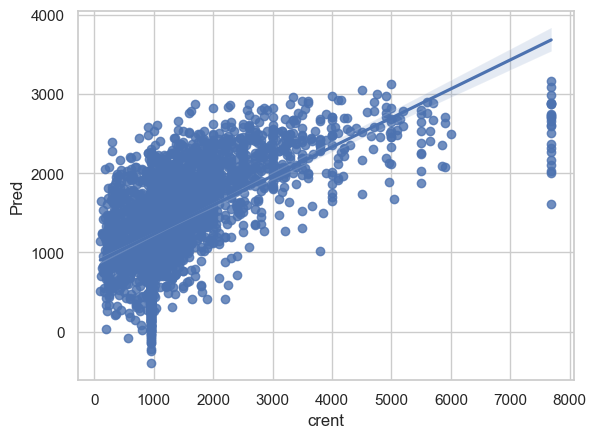

In [706]:
sns.set(style='whitegrid')

sns.regplot(x = y_test,
            y = scatdf['Pred'])

In [707]:
coef_dict_enet = {}
for coef, feature in zip(enet_reg.coef_, X.columns): 
    coef_dict_enet[feature] = coef
coef_dict_enet

{'person': -16.56275665058722,
 'boro': 470.677458266442,
 'sba': -4.401563935146859,
 'units': -32.6914543656105,
 'stories': 123.45070692132362,
 'elevator': -158.42470340307722,
 'yearbuilt': -15.401829425907817,
 'acc_street': 18.225325353570724,
 'acc_elevator': 10.766363200605479,
 'acc_res': -21.96980697938475,
 'nostairs_elevator': 6.049202452314187,
 'nostairs_unit': -41.26595248689959,
 'housingtype': 5.826992549002914,
 'tenure': 8.880245712046275,
 'rooms': 55.04990768377912,
 'beds': 72.82095449270733,
 'aircond': -41.13881460788407,
 'hhsize': 54.221705525753286,
 'hhincome': 1.7763173238208456e-05,
 'memberunder6': 39.39491461393607,
 'memberunder18': -116.94059710642658,
 'mdef_noheat': -5.189459840153851,
 'mdef_rodents': 68.24551922364061,
 'mdef_walls': 15.00249895361421,
 'mdef_floors': -2.83602643140777,
 'mdef_peelingpaint': 13.634144632844858,
 'mdef_toilet': -17.863027420144878,
 'mdef_leaks': 52.18116391368444,
 'addheat': 17.226621454550052,
 'num_noheat': -0.

## Ridge results

In [710]:
alpha = [1e-6, 1, 5, 10, 20, 100, 1000, 10000, 100000, 1e10, 1e12]

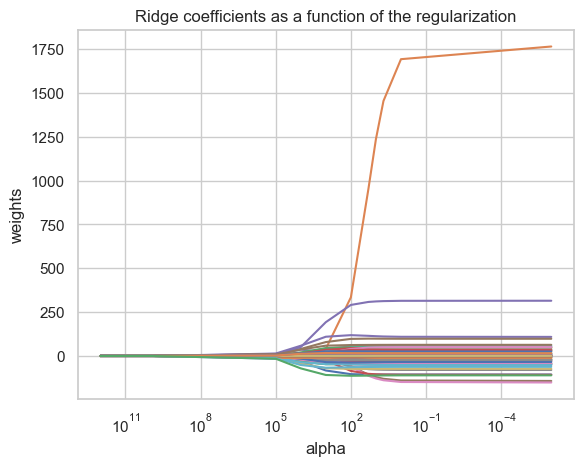

<Figure size 800x800 with 0 Axes>

In [711]:
coefs = []
for a in alpha:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alpha, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# changing the size of figure
plt.figure(figsize=(8, 8))

plt.show()

### ridge regression errors

In [712]:
import sklearn.metrics

In [713]:
#Did I do something wrong? What was it getting large error values the whole time? ~

sklearn.metrics.max_error(y, r_reg.predict(X))

6803.650876212905

In [714]:
sklearn.metrics.mean_squared_error(y, r_reg.predict(X))

570826.5319074567

In [715]:
sklearn.metrics.median_absolute_error(y, r_reg.predict(X))

365.03996986963284